## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [15]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [16]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [18]:
import pandas as pd

col1 = col2 = data_row =[]

count=0
data=data[:len(data)-1]

split_tag ='\t'

for i in data:   
    data_row = i.split(split_tag)
    col1.append(data_row[0])
    col2.append(data_row[1])

arrange_data={'Member':col1,'Photo':col2}

df = pd.DataFrame(arrange_data)
df.head()

,Member,Photo
0,n00015388_157,n00015388_157
1,http://farm1.static.flickr.com/145/430300483_2...,http://farm1.static.flickr.com/145/430300483_2...
2,n00015388_238,n00015388_238
3,http://farm2.static.flickr.com/1005/3352960681...,http://farm2.static.flickr.com/1005/3352960681...
4,n00015388_304,n00015388_304


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [20]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

fl= 6
img=[]

try:
    # 請用 df.loc[...] 得到第一筆資料的連結
    first_link = df.loc[fl,"Photo"]
    response = requests.get(first_link)
    img = Image.open(BytesIO(response.content))
    # Convert img to numpy array
    img=np.array(img)
    plt.imshow(img)
    plt.show()
except:
    print('cannot open photo #.%i'%fl)

cannot open photo #.6


In [21]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    img_list=[]
    count = 0
    for i in url_list:
        img = None
        count +=1
        try:
            response = requests.get(i)
            img = Image.open(BytesIO(response.content))
        except:
            print("can't open photo #{:d}".format(count))
        if img is not None:
            img_list.append(img)       
    return img_list

can't open photo #1
can't open photo #3
can't open photo #5
Total images that we got: 2 


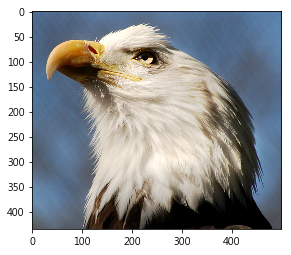

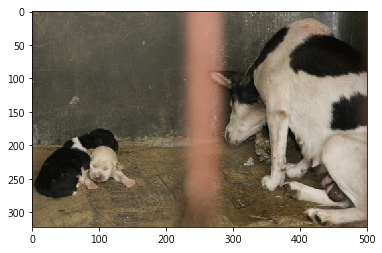

In [23]:
result = img2arr_fromURLs(df[0:5]['Photo'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()